### Telecom customer churn

Data: https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv

The data set includes information about:

-  Customers who left within the last month – the column is called Churn
-  Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
-  Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
-  Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.drop(columns='customerID', inplace=True)
df.Churn = df.Churn.map({'Yes':1, 'No':0})
df = pd.get_dummies(df)
df.shape

(7032, 46)

In [5]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


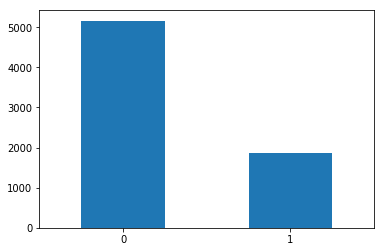

In [6]:
df.Churn.value_counts().plot(kind='bar', rot=0, stacked=True)

### Modeling

In [7]:
y = df.Churn.values
X = df.drop(columns='Churn')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5274, 45) (1758, 45) (5274,) (1758,)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Anaconda2\envs\dva\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score, roc_auc_score, \
                            roc_curve, auc, scorer, classification_report, recall_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, cross_val_predict, \
                             learning_curve, validation_curve

In [11]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.71160409556314


In [12]:
parameters = {'max_depth':range(2, 10), 'criterion':['entropy', 'gini']}
model = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=parameters, n_jobs=-1, cv=5)
model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 10), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [14]:
model_dt = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=1)
model_dt.fit(X_train_scaled, y_train)
pred = model_dt.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.7952218430034129


In [15]:
def plot_learning_curve(model, X, y, n, modelname, cv=5):    
    
    train_sizes, train_scores, validation_scores = learning_curve(model, 
                                                                  X, 
                                                                  y, 
                                                                  train_sizes=np.linspace(0.01, 1.0, n), 
                                                                  cv=cv, 
                                                                  scoring='accuracy', 
                                                                  n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)

    # Draw lines
    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_mean, '--',  label="Training score")
    plt.plot(train_sizes, validation_mean, label="Cross-validation score")

    # Create plot
    plt.title("Learning Curve--" + modelname)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.tight_layout()

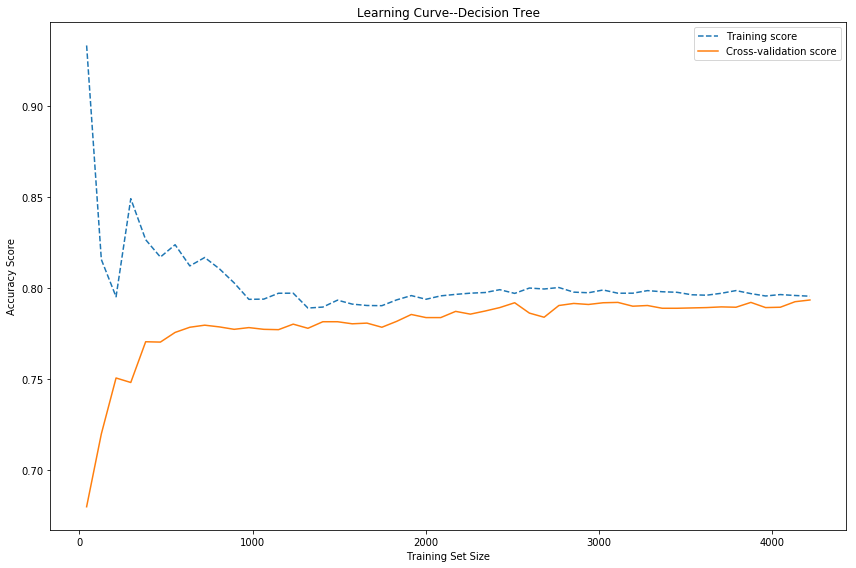

In [18]:
plot_learning_curve(model_dt, X_train_scaled, y_train, 50, "Decision Tree")

In [19]:
def plot_roc_curve(model, train, test, modelname):
    
    preds_train = model.predict_proba(train)[:,1]
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, preds_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    preds_test = model.predict_proba(test)[:,1]
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, preds_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(10, 10))
    plt.title('ROC Curve--' + modelname)
    plt.plot(fpr_train, tpr_train, label = 'Train AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, label = 'Test AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

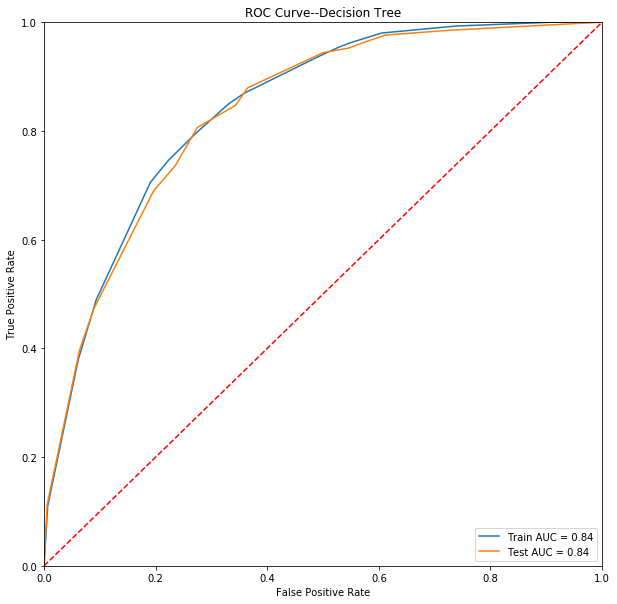

In [20]:
plot_roc_curve(model_dt, X_train_scaled, X_test_scaled, 'Decision Tree')

In [21]:
def auc_diff(model, train, test):
    return (roc_auc_score(y_train, model.predict_proba(train)[:,1]),
            roc_auc_score(y_test, model.predict_proba(test)[:,1]))

def print_results(model, test, pred, modelname):
    print('Results for', modelname)
    print('\nAUC for train vs AUC for test:')
    print(auc_diff(model, X_train_scaled, X_test_scaled))
    print('\nF2 score:\n', fbeta_score(y_test, pred, beta=2))
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, pred))
    print('\nClassification Report:\n', classification_report(y_test, pred))

In [22]:
print_results(model_dt, y_test, pred, 'Decision Tree')

Results for Decision Tree

AUC for train vs AUC for test:
(0.8409455945562363, 0.8363443012844427)

F2 score:
 0.5018248175182481

Confusion Matrix:
 [[1178  116]
 [ 244  220]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.65      0.47      0.55       464

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.80      0.78      1758



### Boosting

In [23]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [68]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.8065984072810012


In [69]:
model_ada = AdaBoostClassifier(n_estimators=34, learning_rate=.2, random_state=1)
model_ada.fit(X_train_scaled, y_train)
pred = model_ada.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.8128555176336746


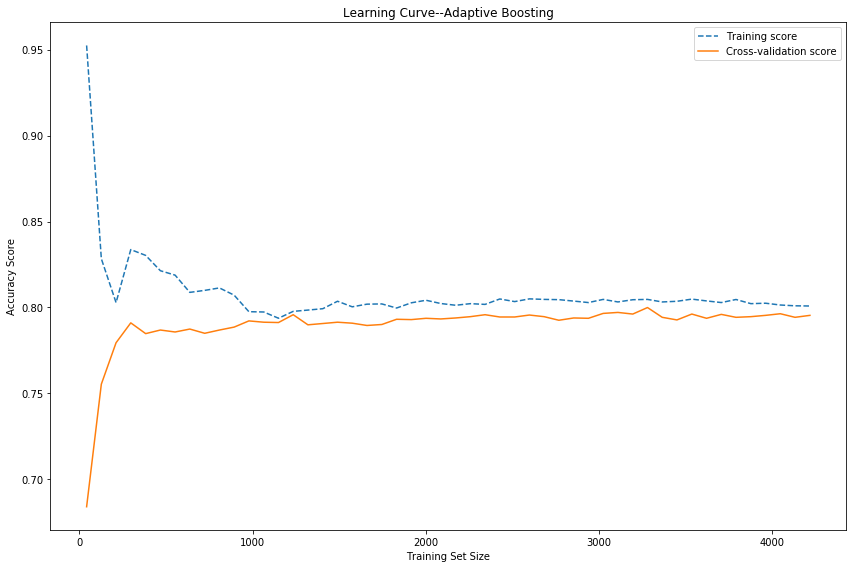

In [70]:
plot_learning_curve(model_ada, X_train_scaled, y_train, 50, "Adaptive Boosting")

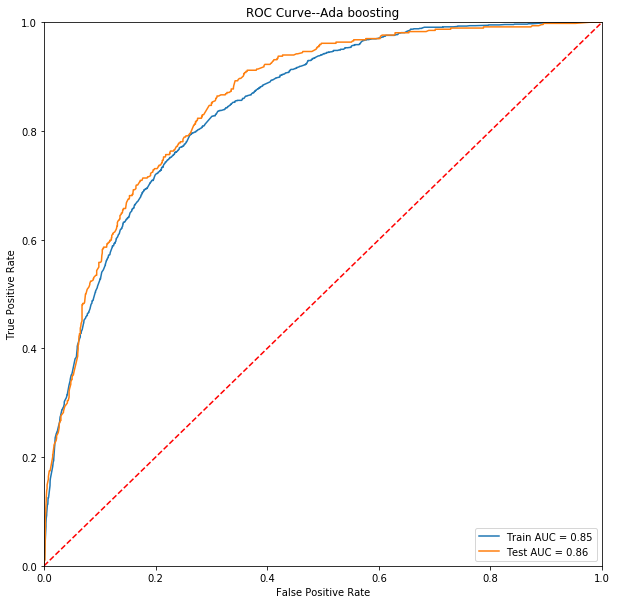

In [71]:
plot_roc_curve(model_ada, X_train_scaled, X_test_scaled, 'Ada boosting')

In [73]:
print_results(model_ada, y_test, pred, 'Ada boosting')

Results for Ada boosting

AUC for train vs AUC for test:
(0.845026485735231, 0.8559915125512978)

F2 score:
 0.5145362251961236

Confusion Matrix:
 [[1206   88]
 [ 241  223]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1294
           1       0.72      0.48      0.58       464

   micro avg       0.81      0.81      0.81      1758
   macro avg       0.78      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



### Boosting using GradientBoostingClassifier

In [74]:
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.8043230944254836


In [111]:
model_gbc = GradientBoostingClassifier(n_estimators=20, max_depth=1, random_state=1, learning_rate=0.7)
model_gbc.fit(X_train_scaled, y_train)
pred = model_gbc.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.810580204778157


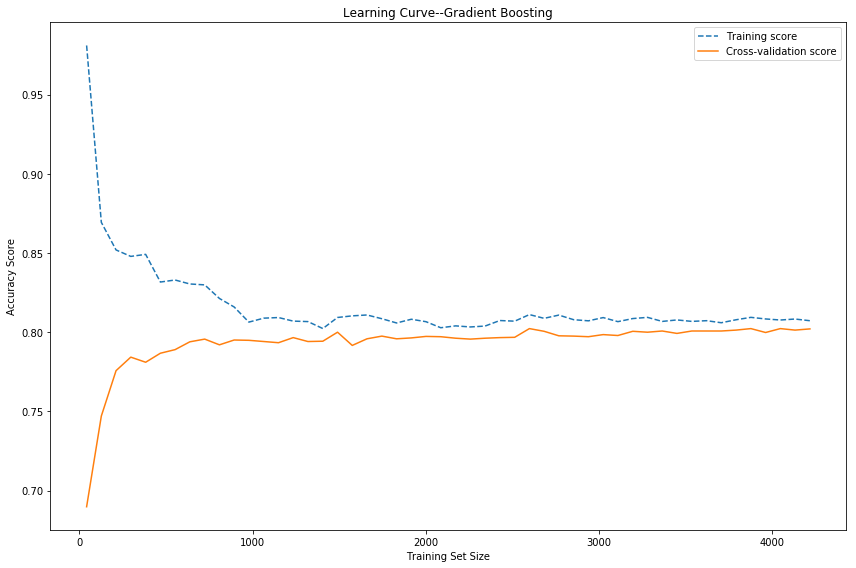

In [113]:
plot_learning_curve(model_gbc, X_train_scaled, y_train, 50, "Gradient Boosting")

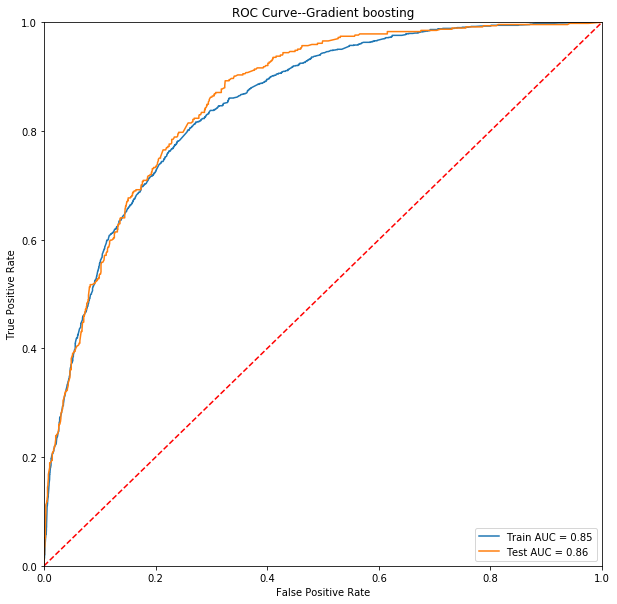

In [114]:
plot_roc_curve(model_gbc, X_train_scaled, X_test_scaled, 'Gradient boosting')

In [115]:
print_results(model_gbc, y_test, pred, 'Gradient boosting')

Results for Gradient boosting

AUC for train vs AUC for test:
(0.849943386108579, 0.8594482825241165)

F2 score:
 0.54421768707483

Confusion Matrix:
 [[1185  109]
 [ 224  240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1294
           1       0.69      0.52      0.59       464

   micro avg       0.81      0.81      0.81      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



### SVM

In [116]:
from sklearn.svm import SVC

In [148]:
model_svc_lin = SVC(kernel='linear', random_state=1, probability=True, C=0.02)
model_svc_lin.fit(X_train_scaled, y_train)
pred = model_svc_lin.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.8037542662116041


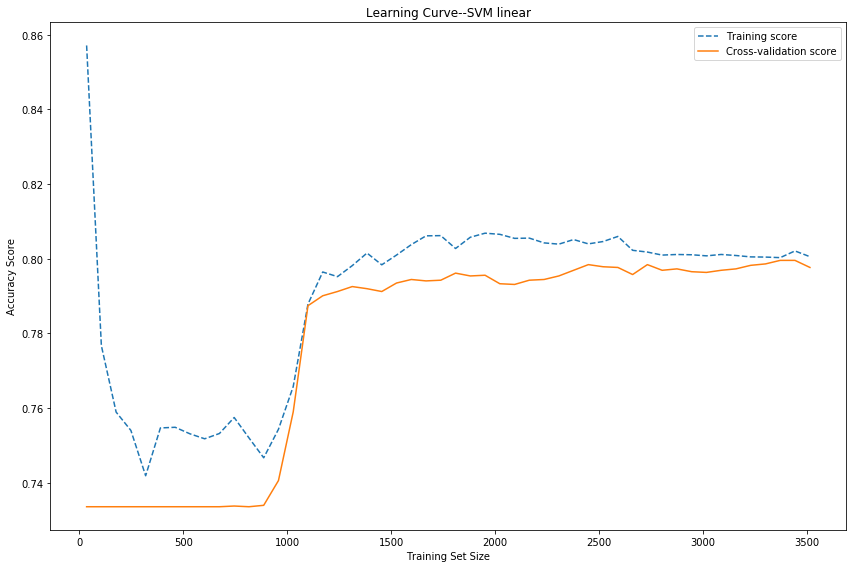

In [150]:
plot_learning_curve(model_svc_lin, X_train_scaled, y_train, 50, "SVM linear", cv=3)

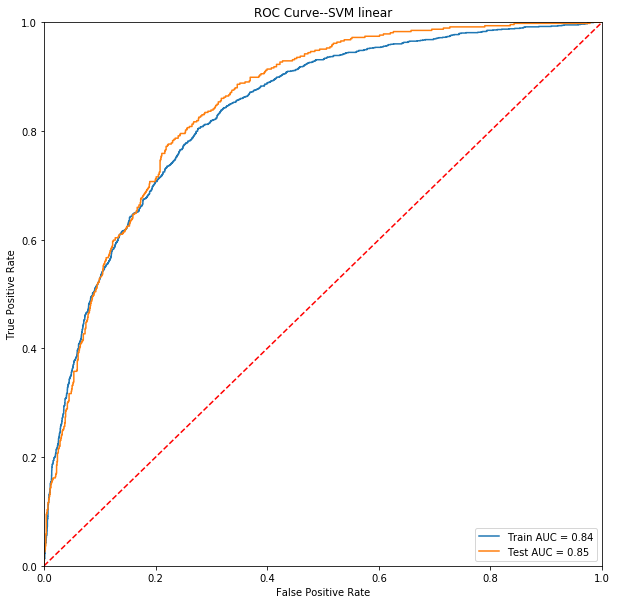

In [151]:
plot_roc_curve(model_svc_lin, X_train_scaled, X_test_scaled, 'SVM linear')

In [152]:
print_results(model_svc_lin, y_test, pred, 'SVM linear')

Results for SVM linear

AUC for train vs AUC for test:
(0.8366754078637662, 0.8490188469327933)

F2 score:
 0.5725699067909454

Confusion Matrix:
 [[1155  139]
 [ 206  258]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1294
           1       0.65      0.56      0.60       464

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.80      0.80      1758



In [153]:
model_svc_sig = SVC(kernel='sigmoid', probability=True, gamma='auto', random_state=1, C=0.6)
model_svc_sig.fit(X_train_scaled, y_train)
pred = model_svc_sig.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.8054607508532423


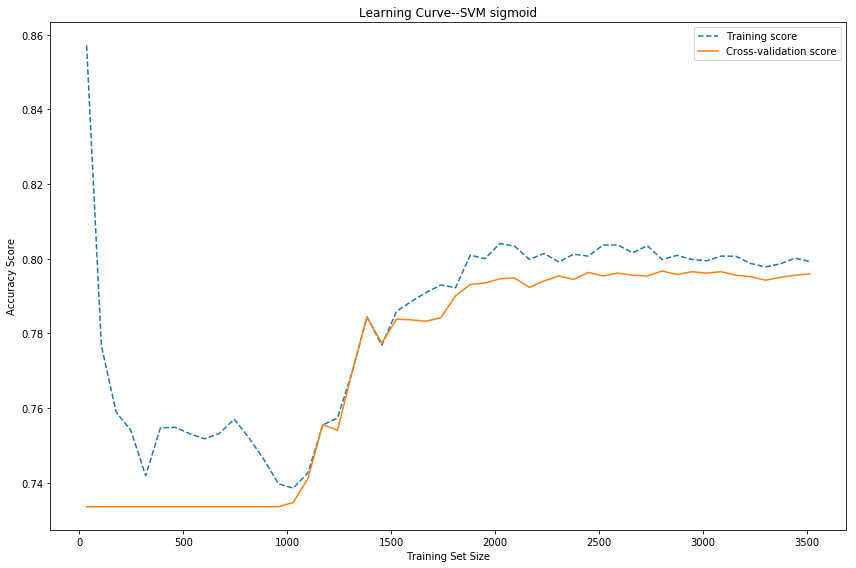

In [154]:
plot_learning_curve(model_svc_sig, X_train_scaled, y_train, 50, "SVM sigmoid", cv=3)

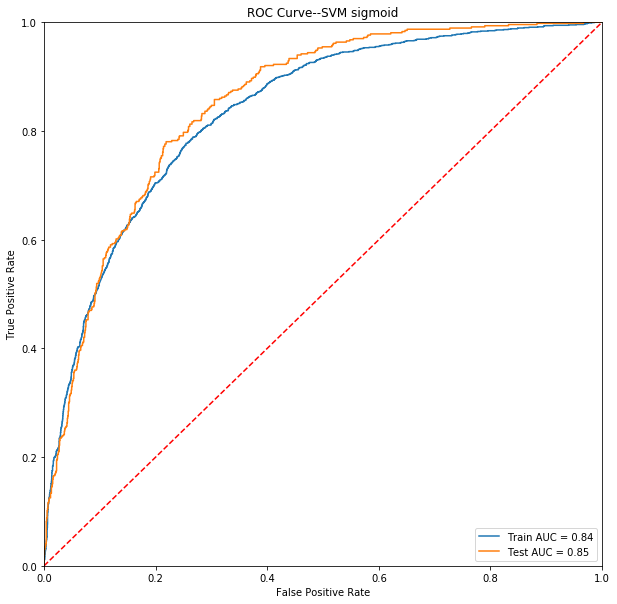

In [155]:
plot_roc_curve(model_svc_sig, X_train_scaled, X_test_scaled, 'SVM sigmoid')

In [156]:
print_results(model_svc_sig, y_test, pred, 'SVM sigmoid')

Results for SVM sigmoid

AUC for train vs AUC for test:
(0.835327620128607, 0.8495026781431542)

F2 score:
 0.5801594331266609

Confusion Matrix:
 [[1154  140]
 [ 202  262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1294
           1       0.65      0.56      0.61       464

   micro avg       0.81      0.81      0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



In [177]:
model_svc_rbf = SVC(kernel='rbf', probability=True, gamma='auto', random_state=1, C=2.5)
model_svc_rbf.fit(X_train_scaled, y_train)
pred = model_svc_rbf.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.8060295790671217


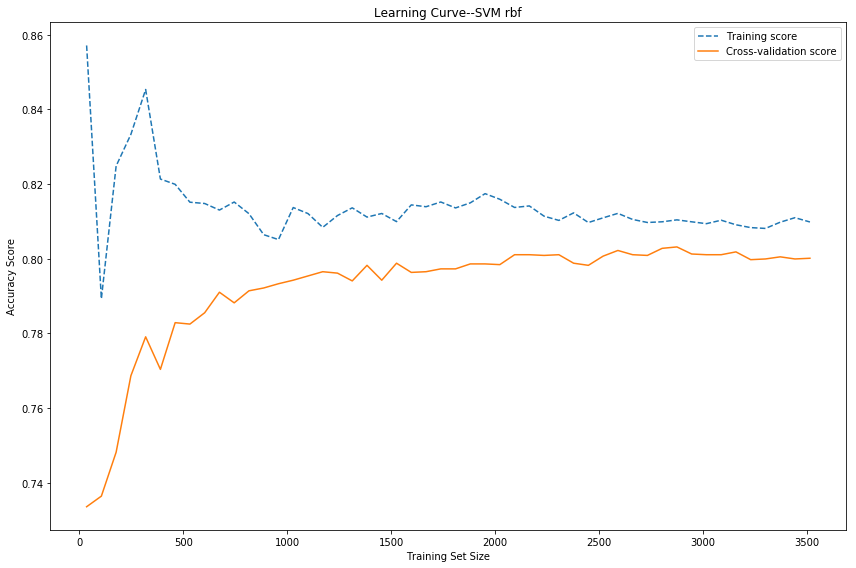

In [178]:
plot_learning_curve(model_svc_rbf, X_train_scaled, y_train, 50, "SVM rbf", cv=3)

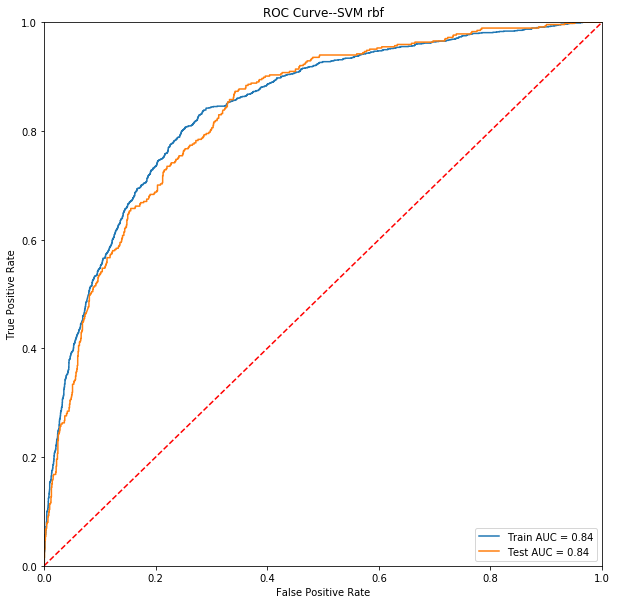

In [179]:
plot_roc_curve(model_svc_rbf, X_train_scaled, X_test_scaled, 'SVM rbf')

In [180]:
print_results(model_svc_rbf, y_test, pred, 'SVM rbf')

Results for SVM rbf

AUC for train vs AUC for test:
(0.8424315367429214, 0.8353608165005595)

F2 score:
 0.5351473922902494

Confusion Matrix:
 [[1181  113]
 [ 228  236]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1294
           1       0.68      0.51      0.58       464

   micro avg       0.81      0.81      0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



### KNN

In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
def knn_test(K, p):
    scores = []
    aucs = []
    f2s = []
    for k in K:
        knn = KNeighborsClassifier(n_neighbors=k, p=p, n_jobs=-1)
        knn.fit(X_train_scaled, y_train)
        pred = knn.predict(X_test_scaled)
        score = accuracy_score(y_test, pred)
        auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1])
        f2 = fbeta_score(y_test, pred, beta=2)
        scores.append(score)
        aucs.append(auc)
        f2s.append(f2)
    return scores, aucs, f2s

In [183]:
K_range = np.arange(1, 45, 2)

# p=1, manhattan distance 
scores_man, aucs_man, f2s_man = knn_test(K_range, 1)

# p=2, euclidean distance
scores_euc, aucs_euc, f2s_euc = knn_test(K_range, 2)

scores_min, aucs_min, f2s_min = knn_test(K_range, 3)

In [184]:
print(max(scores_euc), max(scores_man), max(scores_min))
print(max(aucs_euc), max(aucs_man), max(aucs_min))
print(max(f2s_euc), max(f2s_man), max(f2s_min))

0.7946530147895335 0.7940841865756542 0.7935153583617748
0.8380839284762565 0.8392830970527101 0.8379365306720673
0.6083404987102322 0.6142611683848797 0.6091261300043048


Text(0.5, 1.0, 'KNN model using manhattan distance')

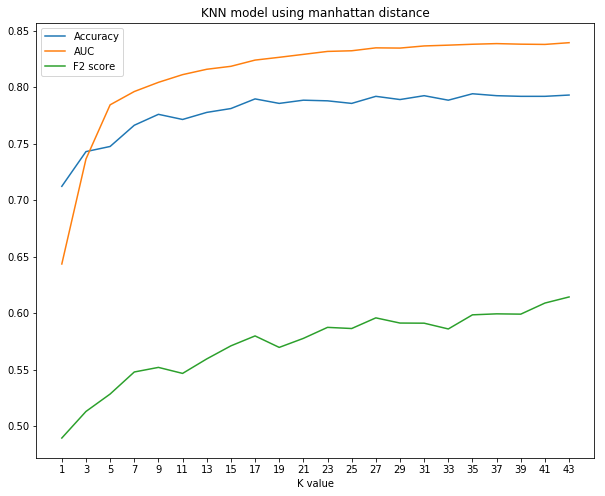

In [185]:
plt.figure(figsize=(10, 8))
plt.plot(K_range, scores_man, label='Accuracy')
plt.plot(K_range, aucs_man, label='AUC')
plt.plot(K_range, f2s_man, label='F2 score')
plt.legend()
plt.xlabel('K value')
plt.xticks(ticks=K_range)
plt.title('KNN model using manhattan distance')

In [186]:
# pick K=41 and metric='manhattan' (p=1)

model_knn = KNeighborsClassifier(n_neighbors=41, p=1, n_jobs=-1)
model_knn.fit(X_train_scaled, y_train)
pred = model_knn.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.7918088737201365


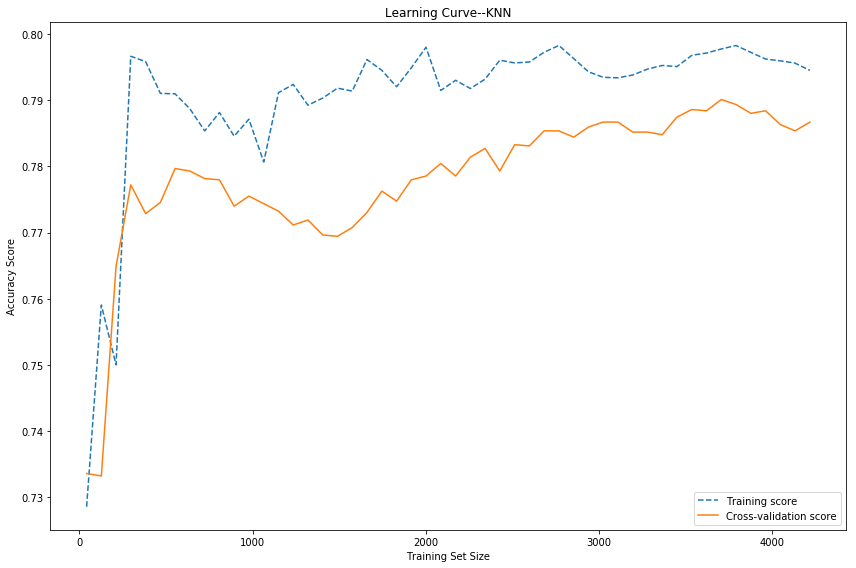

In [191]:
plot_learning_curve(model_knn, X_train_scaled, y_train, 50, "KNN")

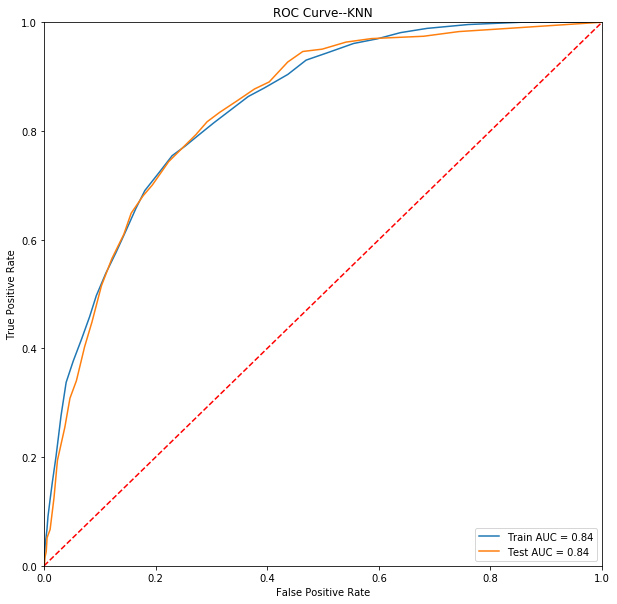

In [192]:
plot_roc_curve(model_knn, X_train_scaled, X_test_scaled, 'KNN')

In [193]:
print_results(model_knn, y_test, pred, 'KNN')

Results for KNN

AUC for train vs AUC for test:
(0.8418166482552711, 0.8377524916058199)

F2 score:
 0.6088640275387264

Confusion Matrix:
 [[1109  185]
 [ 181  283]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1294
           1       0.60      0.61      0.61       464

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.73      0.73      0.73      1758
weighted avg       0.79      0.79      0.79      1758



### MLP

In [194]:
from sklearn.neural_network import MLPClassifier

In [195]:
model_mlp = MLPClassifier(random_state=1, early_stopping=True, hidden_layer_sizes=(300), verbose=10, 
                          max_iter=500, solver='adam', tol=0.000000001, validation_fraction=0.1)

model_mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.56398622
Validation score: 0.789773
Iteration 2, loss = 0.45324793
Validation score: 0.806818
Iteration 3, loss = 0.43739613
Validation score: 0.810606
Iteration 4, loss = 0.42921790
Validation score: 0.816288
Iteration 5, loss = 0.42403521
Validation score: 0.795455
Iteration 6, loss = 0.42043160
Validation score: 0.804924
Iteration 7, loss = 0.41756190
Validation score: 0.821970
Iteration 8, loss = 0.41550515
Validation score: 0.810606
Iteration 9, loss = 0.41263074
Validation score: 0.808712
Iteration 10, loss = 0.41268962
Validation score: 0.814394
Iteration 11, loss = 0.41144260
Validation score: 0.808712
Iteration 12, loss = 0.40852230
Validation score: 0.812500
Iteration 13, loss = 0.40699102
Validation score: 0.812500
Iteration 14, loss = 0.40757730
Validation score: 0.806818
Iteration 15, loss = 0.40672671
Validation score: 0.808712
Iteration 16, loss = 0.40244576
Validation score: 0.814394
Iteration 17, loss = 0.40162534
Validation score: 0.816288
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=300, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=1e-09,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [196]:
pred = model_mlp.predict(X_test_scaled)
print(accuracy_score(y_test, pred))

0.8054607508532423


Text(0, 0.5, 'Validation loss')

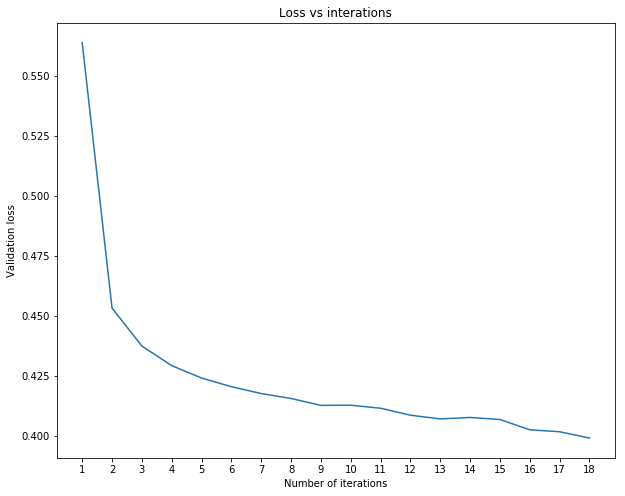

In [209]:
param_range = np.arange(1, model_mlp.n_iter_+1)
plt.figure(figsize=(10, 8))
plt.plot(param_range, model_mlp.loss_curve_)
plt.title('Loss vs interations')
plt.xticks(param_range)
plt.xlabel('Number of iterations')
plt.ylabel('Validation loss')

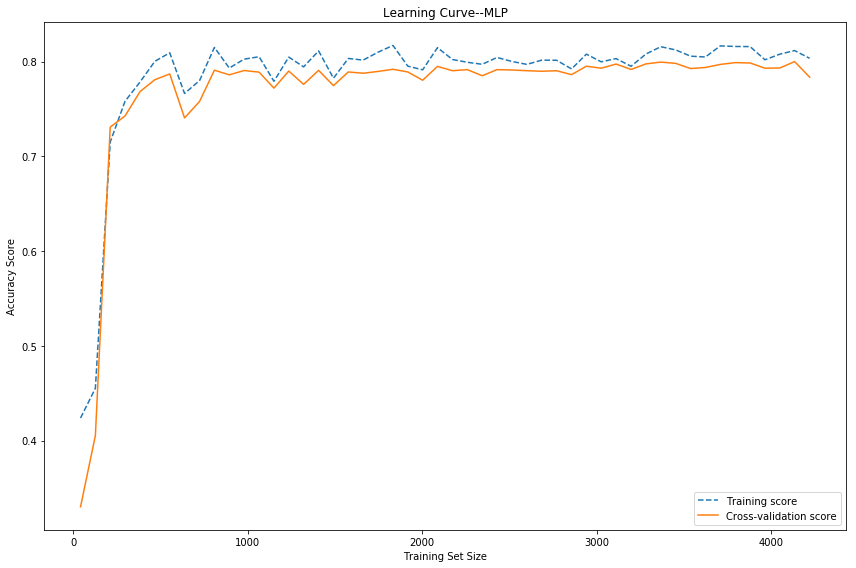

In [211]:
plot_learning_curve(model_mlp, X_train_scaled, y_train, 50, "MLP", cv=5)

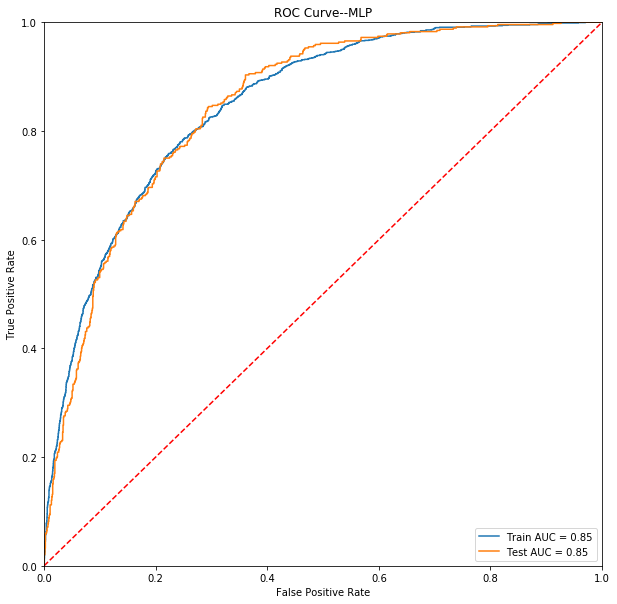

In [212]:
plot_roc_curve(model_mlp, X_train_scaled, X_test_scaled, 'MLP')

In [213]:
print_results(model_mlp, y_test, pred, 'MLP')

Results for MLP

AUC for train vs AUC for test:
(0.8484494416334235, 0.847372488408037)

F2 score:
 0.5366847826086957

Confusion Matrix:
 [[1179  115]
 [ 227  237]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1294
           1       0.67      0.51      0.58       464

   micro avg       0.81      0.81      0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.79      0.81      0.80      1758



### Summary

In [277]:
models = {'Decision Tree':model_dt, 
          'Adaptive Boosting':model_ada, 
          'Gradient Boosting':model_gbc, 
          'SVM linear':model_svc_lin,
          'SVM sigmoid':model_svc_sig,
          'SVM rbf':model_svc_rbf, 
          'KNN':model_knn,
          'MLP':model_mlp}

scorer = make_scorer(fbeta_score, beta=2)
scores = {'Accuracy':'accuracy', 'AUC':'roc_auc', 'F2_score':scorer}

for model in models:
    print('\n' + model + ':')
    for score in scores:
        result = cross_val_score(models[model], X_train_scaled, y_train, cv=10, n_jobs=-1, scoring=scores[score])    
        print("%s: %0.4f (+/- %0.4f)" % (score, result.mean(), result.std() * 2))


Decision Tree:
Accuracy: 0.7928 (+/- 0.0288)
AUC: 0.8300 (+/- 0.0484)
F2_score: 0.5099 (+/- 0.0488)

Adaptive Boosting:
Accuracy: 0.7950 (+/- 0.0397)
AUC: 0.8405 (+/- 0.0473)
F2_score: 0.4792 (+/- 0.0660)

Gradient Boosting:
Accuracy: 0.8013 (+/- 0.0428)
AUC: 0.8446 (+/- 0.0463)
F2_score: 0.5481 (+/- 0.0834)

SVM linear:
Accuracy: 0.7975 (+/- 0.0429)
AUC: 0.8329 (+/- 0.0488)
F2_score: 0.5517 (+/- 0.1105)

SVM sigmoid:
Accuracy: 0.7950 (+/- 0.0471)
AUC: 0.8327 (+/- 0.0494)
F2_score: 0.5455 (+/- 0.1166)

SVM rbf:
Accuracy: 0.8024 (+/- 0.0344)
AUC: 0.8241 (+/- 0.0428)
F2_score: 0.5301 (+/- 0.0869)

KNN:
Accuracy: 0.7820 (+/- 0.0457)
AUC: 0.8243 (+/- 0.0587)
F2_score: 0.5680 (+/- 0.0844)

MLP:
Accuracy: 0.7975 (+/- 0.0334)
AUC: 0.8376 (+/- 0.0467)
F2_score: 0.5723 (+/- 0.1255)
